# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

## 1. Описание данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, recall_score, precision_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from scipy.spatial import distance
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [7]:
main = pd.read_csv('telecom_users.csv')
del main['Unnamed: 0'] #удаляем лишний столбец
main.loc[main['SeniorCitizen']==0,'SeniorCitizen']="No"
main.loc[main['SeniorCitizen']==1,'SeniorCitizen']="Yes"
main.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,No,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,No,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,No,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
#меняем тип данных столбца TotalCharges на float
main['TotalCharges'] = main['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [9]:
#смена типа данных невозможна так, как столбец содержит пустые строки, как указано в ошибке. 
main[main['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [10]:
#Пропущенные данные относятся в неотточным клиентам. Определим долю пропущенных значений от общего числа клиентов данной
#категории/
(main[main['TotalCharges']==' '].shape[0]/main[main['Churn']=='No'].shape[0])*100

0.22732439190725162

Доля пропущенных значений 0,227%, пропущенные данные можно удалить.

In [11]:
#удаляем строки с пропущенными значениями и меняем тип данных столбца
main = main.loc[main['TotalCharges']!= ' ']
main['TotalCharges'] = main['TotalCharges'].astype(float)

In [12]:
main.describe(include=[np.object])

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,5976,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3044,5010,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


Вывод: в итоговом датафрейме 5976 записей, удалено 10 строк с пропущенными значениями в столбце TotalCharges. Основная часть признаков это категориальные данные, колчиственных признаков всего - ежемесячная плата, общая сумма за все время и продолжительность пользования услугами.

## 2. Исследование зависимостей и формулирование гипотез

Для построения графиков и диаграм зависимостей создадим новый датафрейм, в котором заменим категориальные строковые значения числами.

In [8]:
new_df = main.copy()
for i in main.select_dtypes(include=['object']).iloc[:,1:]:
    new_df[i] = new_df[i].astype('category').cat.codes
new_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,1,0,1,1,72,1,2,2,1,...,1,1,1,1,2,0,1,24.10,1734.65,0
1,9688-YGXVR,0,0,0,0,44,1,0,1,0,...,2,0,2,0,0,1,1,88.15,3973.20,0
2,9286-DOJGF,0,1,1,0,38,1,2,1,0,...,0,0,0,0,0,1,0,74.95,2869.85,1
3,6994-KERXL,1,0,0,0,4,1,0,0,0,...,0,0,0,2,0,1,2,55.90,238.50,0
4,2181-UAESM,1,0,0,0,2,1,0,0,2,...,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,1,0,1,0,1,1,0,1,2,...,0,0,2,2,0,1,2,95.00,95.00,1
5982,5982-PSMKW,0,0,1,1,23,1,2,0,2,...,2,2,2,2,2,1,1,91.10,2198.30,0
5983,8044-BGWPI,1,0,1,1,12,1,0,2,1,...,1,1,1,1,0,1,2,21.15,306.05,0
5984,7450-NWRTR,1,1,0,0,12,1,2,1,0,...,2,0,2,2,0,1,2,99.45,1200.15,1


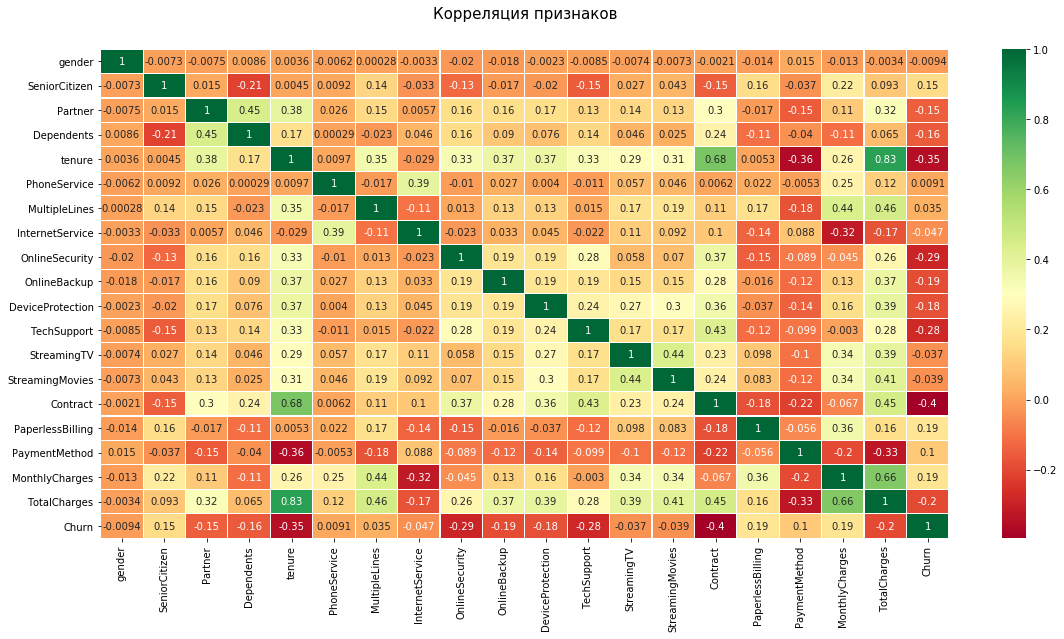

In [9]:
fig=plt.gcf()
fig.set_size_inches(19,9)
plt.title('Корреляция признаков', y=1.05, size=15)
sns.heatmap(new_df.iloc[:, 1:].astype(float).corr(),linewidths=0.1, 
             linecolor='white',cmap="RdYlGn", annot=True)
plt.show()

После кодирования ушедшие клиенты столбце Churn это 1, а оставшиеся, то есть отрицательная корреляция показывает связь признаков с оставшимися клиентами. Из тепловой карты видно, что с ушедшими клиентами самая сильная корреляция у признаков MonthlyCharges, Senior_Citizen, Paperless_Billings. Признаки связанные с оставшимися клиентами Contract, tenure, OnlineSecurity. Также заметна сильная корреляция признака TotalCharges с MonthlyCharges, tenure, что достаточно очевидно ведь общая сумма платежа за все время практически равняется продожительности пользования услугами умноженной на ежемесячный платеж. 

**Зависимость между оттоком клиентов и продолжительностью пользования услугами компании**

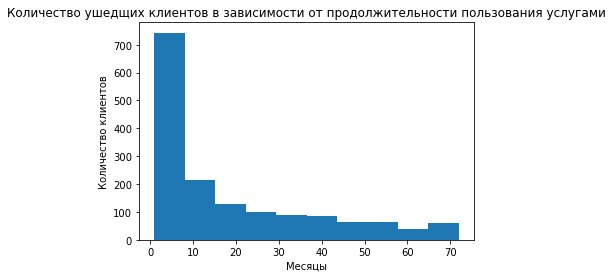

In [10]:
plt.hist(new_df[new_df['Churn']==1]['tenure'], bins=10)
plt.title('Количество ушедщих клиентов в зависимости от продолжительности пользования услугами')
plt.xlabel('Месяцы')
plt.ylabel('Количество клиентов')
plt.show()

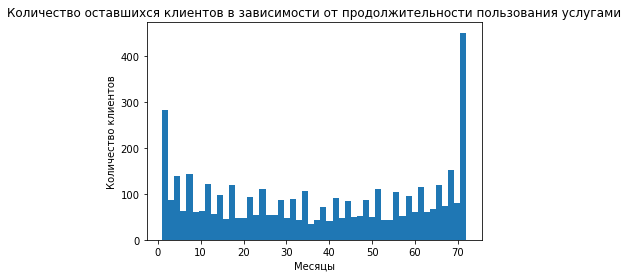

In [11]:
plt.hist(new_df[new_df['Churn']==0]['tenure'], bins=50)
plt.title('Количество оставшихся клиентов в зависимости от продолжительности пользования услугами')
plt.xlabel('Месяцы')
plt.ylabel('Количество клиентов')
plt.show()

На графике с ушедшими клиентами видно, что в основная часть ушедших клиентов приходится на период 0 до 1.5 лет. Наблюдается явная взаимосвязь между количеством клиентов и продолжительностью пользования улугами.
На гистограмме с ушедшими клиентами виден резкий спад числа клиентов на начальном этапе, можно предположить, что у компании хорошая реклама для привлечения новых клиентов и хорошие стартовые условия, но слабые способы удержания клиентов впоследствии. Выброс в конце графика говорит о некотором количестве клиентов, которые остаются с фирмой не смотря ни на что, возможно по привычке. 

**Отток в зависимости от соц.статуса**

In [12]:
citizen  = main.groupby(['Churn', 'SeniorCitizen'])['customerID'].count()

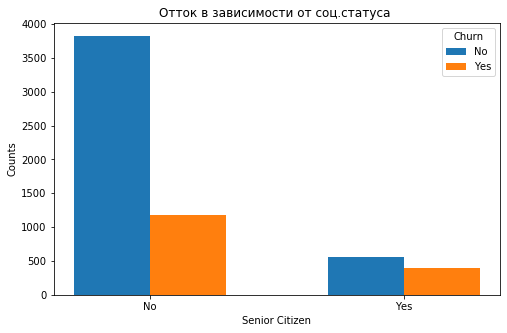

In [13]:
width=0.3
x1 = np.arange(0, 2)
x2 = np.arange(0, 2)
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x1-width/2, citizen.loc["No"],width)
ax.bar(x2+width/2, citizen.loc["Yes"],width)
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.legend(["No", "Yes"],title="Churn")
plt.title("Отток в зависимости от соц.статуса ")
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Counts')
plt.show()

На графике видно, что пенсионеров пользующухся услугами компании в принципе меньше. Стоит обратить на это внимание и подумать,
как увеличить эту категорию клиентов.

**Отток в зависимости от пола**

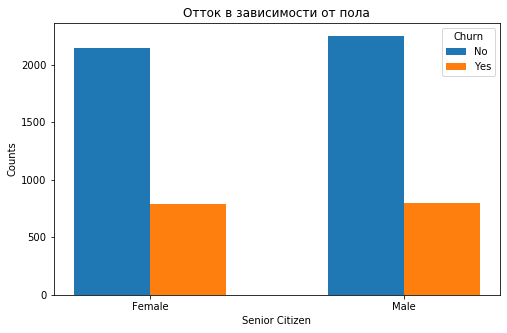

In [14]:
gender  = main.groupby(['Churn', 'gender'])['customerID'].count()
width=0.3
x1 = np.arange(0, 2)
x2 = np.arange(0, 2)
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x1-width/2, gender.loc["No"],width)
ax.bar(x2+width/2, gender.loc["Yes"],width)
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.legend(["No", "Yes"],title="Churn")
plt.title("Отток в зависимости от пола")
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Counts')
plt.show()

Данный график показывает, что услугами компании в равной мере пользуются клиенты обоих полов.

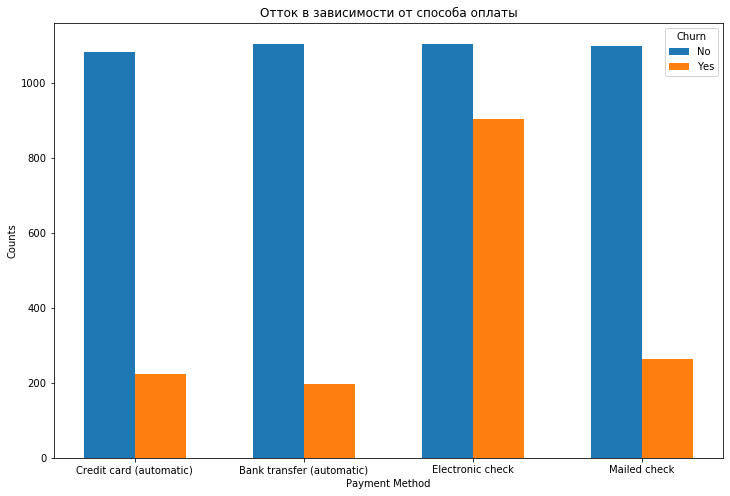

In [15]:
pay_method = main.groupby(['Churn', 'PaymentMethod'])['customerID'].count()
width=0.3
x1 = np.arange(0, 4)
x2 = np.arange(0, 4)
x1 = np.arange(0, 4)
x2 = np.arange(0, 4)
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x1-width/2, pay_method.loc["No"],width)
ax.bar(x2+width/2, pay_method.loc["Yes"],width)
# ax.bar(x2+width/2, gender.loc["Yes"],width)
# ax.bar(x2+width/2, gender.loc["Yes"],width)
plt.xticks(np.arange(4), main['PaymentMethod'].unique())
plt.legend(["No", "Yes"],title="Churn")
plt.title("Отток в зависимости от способа оплаты")
ax.set_xlabel('Payment Method')
ax.set_ylabel('Counts')
plt.show()

Стоит обратить внимание на клиентов, использующих способ оплаты Electronic Check, отток в этой группе клиентов намного выше, чем в остальных группах.

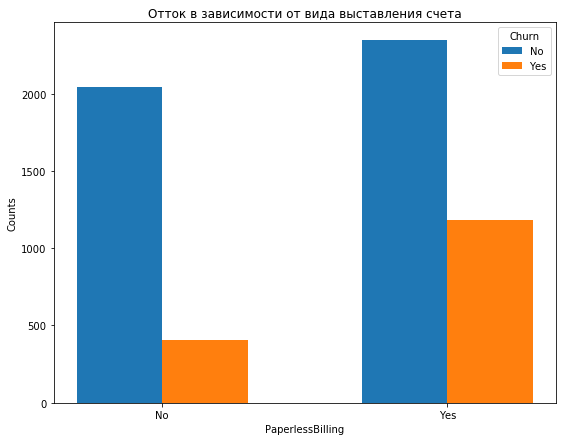

In [16]:
paper = main.groupby(['Churn', 'PaperlessBilling'])['customerID'].count()
width=0.3
x1 = np.arange(0, 2)
x2 = np.arange(0, 2)
fig, ax = plt.subplots(figsize=(9,7))
ax.bar(x1-width/2, paper.loc["No"],width)
ax.bar(x2+width/2, paper.loc["Yes"],width)
# ax.bar(x2+width/2, gender.loc["Yes"],width)
# ax.bar(x2+width/2, gender.loc["Yes"],width)
plt.xticks(np.arange(2), main['PaperlessBilling'].unique())
plt.legend(["No", "Yes"],title="Churn")
plt.title("Отток в зависимости от вида выставления счета")
ax.set_xlabel('PaperlessBilling')
ax.set_ylabel('Counts')
plt.show()

Данный график показывает, отток в группе людей предпочитающих электронные счета выше. Возможно есть проблемы в работе интернет-сервисов, что затрудняет процедуру оплаты. Также можно выдвинуть предположение что клиенты пользующиеся электронными чеками внимательнее относятся к своим расходам.

## 3. Построение моделей для прогнозирования оттока

In [165]:
#Создадим копию датафрейма и преобразуем категориальные данные методом get_dummies
main_digit = main.copy()
main_digit = pd.get_dummies(main_digit.iloc[:,1:20])                                      
main_digit

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,24.10,1734.65,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,44,88.15,3973.20,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,38,74.95,2869.85,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,4,55.90,238.50,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,2,53.45,119.50,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,95.00,95.00,0,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
5982,23,91.10,2198.30,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
5983,12,21.15,306.05,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,12,99.45,1200.15,0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [166]:
X = main_digit.copy()
del X['TotalCharges'] #удаляем столбец TotalCharges из высокой корреляции с показателями tenure и MonthlyCharges.
main['Churn'] = main['Churn'].astype('category').cat.codes
y = main['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28, stratify=y)

In [167]:
#непрерывные количетсвенные признаки нормализуем методом MinMaxScaler, чтобы значения находились в промежутке от 0 до 1.
scaler = MinMaxScaler()
x_train[['tenure','MonthlyCharges']] = scaler.fit_transform(x_train[['tenure','MonthlyCharges']])
x_test[['tenure','MonthlyCharges']] = scaler.transform(x_test[['tenure','MonthlyCharges']])

Обучим модель RandomForestClassifier и подберем для нее  наилучшие параметры, используя GridSearchCV. Обязательно укажем в параметрах roc_auc, так как этот показатель наиболее важен в текущей задаче классификации.

In [168]:
%%time
parameters = {'n_estimators': range(10, 60, 10),
              'max_depth': range(2, 8, 1),
              'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': range(2, 8, 1),  
              'criterion': ['gini', 'entropy']}    
rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(rfc, parameters,cv=5, n_jobs=-1,scoring = 'roc_auc')
grid_search_rfc.fit(x_train, y_train)

Wall time: 4min 1s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 8),
                         'n_estimators': range(10, 60, 10)},
             scoring='roc_auc')

In [169]:
predictions = grid_search_rfc.predict(x_test)
roc_auc = roc_auc_score(y_test, grid_search_rfc.predict_proba(x_test)[:, 1])
print(f'accuracy_score: {accuracy_score(y_test, predictions)} roc_auc: {roc_auc}' )                          

accuracy_score: 0.7953151143335192 roc_auc: 0.8380151605061159


In [171]:
#выведем лучшие параметры для модели RandomForestClassifier
grid_search_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 40}

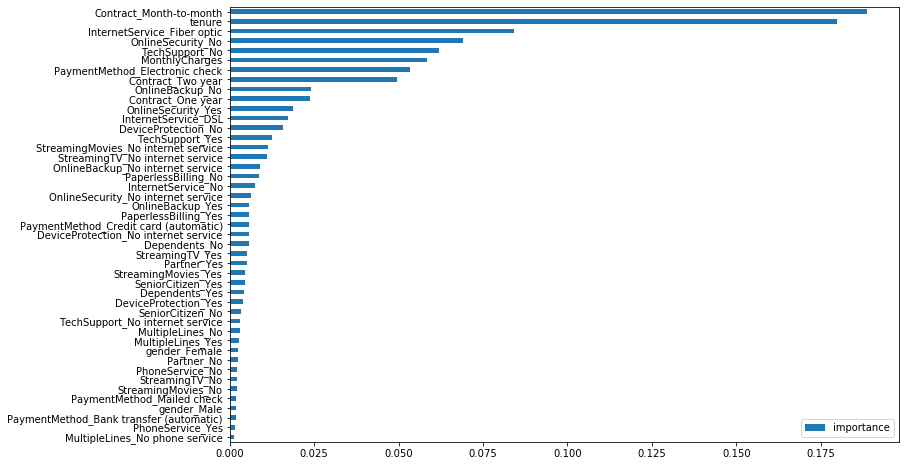

In [172]:
#Определим какие признаки больше всего вляют на показатель оттока
best_rfc = grid_search_rfc.best_estimator_
imp = pd.DataFrame(best_rfc.feature_importances_, index=x_train.columns, columns=['importance'])\
                    .sort_values('importance')
imp.plot(kind='barh', figsize=(12, 8))
plt.show()

Обучим модель заново и подберем для нее параметры, без учета 15 признаков в наименьшей степени влияющих на целевой показатель.

In [173]:
# для удобства сохраним новый датафрейм с наиболее значимыми признаками в csv-файл
temp_df = X.loc[:,imp.index[15:]]
temp_df.to_csv('data_ml.csv', index=False)

In [179]:
X2 = pd.read_csv('data_ml.csv')
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=30,stratify=y)
scaler = MinMaxScaler()
x_train2[['tenure','MonthlyCharges']] = scaler.fit_transform(x_train2[['tenure','MonthlyCharges']])
x_test2[['tenure','MonthlyCharges']] = scaler.transform(x_test2[['tenure','MonthlyCharges']])

In [180]:
%%time
parameters = {'n_estimators': range(10, 60, 10),
              'max_depth': range(2, 8, 1),
              'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': range(2, 8, 1),  
              'criterion': ['gini', 'entropy']}    
rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(rfc, parameters,cv=5, n_jobs=-1, scoring = 'roc_auc')
grid_search_rfc.fit(x_train2, y_train2)

Wall time: 4min 3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 8),
                         'n_estimators': range(10, 60, 10)},
             scoring='roc_auc')

In [181]:
predictions = grid_search_rfc.predict(x_test2)
roc_auc = roc_auc_score(y_test2, grid_search_rfc.predict_proba(x_test2)[:, 1])
print(f'accuracy_score: {accuracy_score(y_test2, predictions)} roc_auc: {roc_auc}' )                          

accuracy_score: 0.8059118795315114 roc_auc: 0.845074590200545


Качество модели незначительно улучшилось, попробуем обучить другие модели и сравнить их.

In [182]:
recall_score(y_test2, predictions)

0.5525210084033614

Обуим другие модели с наилучшими параметрами и сравним их

In [183]:
gbc_params = {
              'learning_rate': np.arange(0.1, 0.6, 0.1),
              'max_depth':[5],
              'max_features':[4],
              'n_estimators':np.arange(10, 100, 10),
            'criterion': ["friedman_mse"]
             } 
rfc_params = {'n_estimators': range(10, 50, 20),
              'max_depth': range(2, 10, 1), 
              'min_samples_split': range(2, 10, 1),  
              'criterion': ['gini','entropy']}  
svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}
knn_params = {'n_neighbors': np.arange(2, 20, 2), # KNeighborsClassifier
              'leaf_size': np.arange(5, 50, 5),
              'weights': ['uniform', 'distance']}
logreg_params = {'C': np.arange(0.5, 1, 0.1)}
nb_params = {
                'var_smoothing': np.logspace(0,-9, num=100)}

list_params = ['gbc_params','rfc_params','svc_params','knn_params','logreg_params','nb_params']



In [184]:
%%time
gbc = GradientBoostingClassifier(random_state=30)
rfc = RandomForestClassifier(random_state=30, n_jobs=-1)
knn = KNeighborsClassifier(n_jobs=-1)
logreg = LogisticRegression(random_state=30, n_jobs=-1)
nb = GaussianNB()
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
# создаем переменную x и список имен моделей в виде строк для того , чтобы было проще работать с данными переменными в циклах,
# а также чтобы не создавать список с параметрами моделей.
x = globals()
models = [gbc, rfc, knn, logreg, nb]
list_params = [gbc_params, rfc_params, knn_params, logreg_params, nb_params]
best_param = []
best_estim = []
for i,val in enumerate(models):
    model_grid = GridSearchCV(val, list_params[i], cv=skf, error_score='raise', scoring = 'roc_auc').fit(x_train2,y_train2)
    x[f'{i}_params'] = model_grid.best_params_
    best_param.append(x[f'{i}_params'])
    print(f'Best {val}:',model_grid.best_params_)  


Best GradientBoostingClassifier(random_state=30): {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 4, 'n_estimators': 30}
Best RandomForestClassifier(n_jobs=-1, random_state=30): {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 30}
Best KNeighborsClassifier(n_jobs=-1): {'leaf_size': 5, 'n_neighbors': 18, 'weights': 'uniform'}
Best LogisticRegression(n_jobs=-1, random_state=30): {'C': 0.7999999999999999}
Best GaussianNB(): {'var_smoothing': 0.12328467394420659}
Wall time: 4min 2s


In [185]:
xgbc = XGBClassifier(n_estimators=20, learning_rate=0.2,
                    max_depth=3, min_child_weight=8, gamma=2,
                    subsample=0.8, colsample_bytree=0.8,
                    scale_pos_weight=1, seed=20, objective ='binary:logistic')

gbc = GradientBoostingClassifier(random_state=30,**{'criterion': 'friedman_mse', 
                                                    'learning_rate': 0.1, 
                                                    'max_depth': 5,
                                                    'max_features': 4,
                                                    'n_estimators': 30})
rfc = RandomForestClassifier(random_state=30, n_jobs=-1,
                             criterion='gini', max_depth = 6,
                             max_features = 'auto',
                             min_samples_split = 2,
                             n_estimators = 30)
knn = KNeighborsClassifier(n_jobs=-1, **{'leaf_size': 5, 'n_neighbors': 18, 'weights': 'uniform'})
logreg = LogisticRegression(random_state=30, n_jobs=-1, **{'C': 0.7999999999999999})
nb = GaussianNB(**{'var_smoothing': 0.8999999999999999})
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=10, learning_rate=0.1, random_state=20)
models = [xgbc,gbc, rfc, knn, logreg, nb, ada]
for i in models:
    i.fit(x_train2, y_train2)
    pred = i.predict(x_test2)
    acc_score = accuracy_score(y_test2, pred)
    roc_auc = roc_auc_score(y_test2, i.predict_proba(x_test2)[:, 1])
    print(f'Model {i.__class__.__name__}\n accuracy_score: {acc_score} roc_auc: {roc_auc}\n=====================================' )                          

[14:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBClassifier
 accuracy_score: 0.8131622978248745 roc_auc: 0.8517559643447357
Model GradientBoostingClassifier
 accuracy_score: 0.8047964305633017 roc_auc: 0.847839021713469
Model RandomForestClassifier
 accuracy_score: 0.807585052983826 roc_auc: 0.8442275543474794
Model KNeighborsClassifier
 accuracy_score: 0.7964305633017289 roc_auc: 0.82236334169203
Model LogisticRegression
 accuracy_score: 0.8064696040156163 roc_auc: 0.8436070327903371
Model GaussianNB
 accuracy_score: 0.6692693809258227 roc_auc: 0.8191052047242587
Model AdaBoostClassifier
 accuracy_score: 0.8042387060791969 roc_auc: 0.8471754305366792


***Стекинг***

In [186]:
estimators = [
    ('RandomForestClassifier', RandomForestClassifier(random_state=30, n_jobs=-1,
                             criterion='gini', max_depth = 6,
                             max_features = 'auto',
                             min_samples_split = 3,
                             n_estimators = 30)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=30,**{'criterion': 'friedman_mse', 
                                                    'learning_rate': 0.1, 
                                                    'max_depth': 5,
                                                    'max_features': 4,
                                                    'n_estimators': 30})),
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=42, C=0.7999999999999999)),

    ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1, leaf_size=5, n_neighbors=18, weights='uniform'))
]

final_estimator = GradientBoostingClassifier(random_state=42,
                                                            criterion='friedman_mse',
                                                            ccp_alpha=0, 
                                                            learning_rate=0.5,                                                         
                                                            max_depth = 5,
                                                            max_features = 4,
                                                            n_estimators=30,)
final_estimator = XGBClassifier(n_estimators=20, learning_rate=0.2,
                    max_depth=3, min_child_weight=8, gamma=2,
                    subsample=0.8, colsample_bytree=0.8,
                    scale_pos_weight=1, seed=20, objective ='binary:logistic')
reg = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
reg.fit(x_train2, y_train2)
predictions = reg.predict(x_test2)
accuracy_score(y_test2, predictions)

[14:35:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8025655326268823

In [187]:
roc_auc_score(y_test2, reg.predict_proba(x_test2)[:, 1])

0.8432696541030991

## 4. Сравнение качества полученных моделей.

In [188]:
models = [xgbc,gbc, rfc, knn, logreg, nb, ada, reg]

In [189]:
for i in models:
    i.fit(x_train2, y_train2)
    pred = i.predict(x_test2)
    acc_score = accuracy_score(y_test2, pred)
    roc_auc = roc_auc_score(y_test2, i.predict_proba(x_test2)[:, 1])
    print(f'Model {i.__class__.__name__}\n accuracy_score: {acc_score} roc_auc: {roc_auc}')

[14:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGBClassifier
 accuracy_score: 0.8131622978248745 roc_auc: 0.8517559643447357
Model GradientBoostingClassifier
 accuracy_score: 0.8047964305633017 roc_auc: 0.847839021713469
Model RandomForestClassifier
 accuracy_score: 0.807585052983826 roc_auc: 0.8442275543474794
Model KNeighborsClassifier
 accuracy_score: 0.7964305633017289 roc_auc: 0.82236334169203
Model LogisticRegression
 accuracy_score: 0.8064696040156163 roc_auc: 0.8436070327903371
Model GaussianNB
 accuracy_score: 0.6692693809258227 roc_auc: 0.8191052047242587
Model AdaBoostClassifier
 accuracy_score: 0.8059118795315114 roc_auc: 0.8476723263337226
[14:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

**Модель с лучшим roc_auc_score - XGBClassifier**

Отобразим кривые roc_auc на графике.

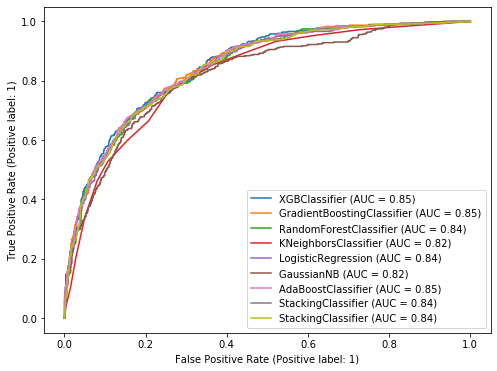

In [191]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in models:
    plot_roc_curve(i, x_test2, y_test2,ax=ax)
plot_roc_curve(reg, x_test2, y_test2,ax=ax)

**Сохраним лучшую модель для проверки на закрытом тесте**

In [200]:
import pickle
filename = 'best_model.sav'
pickle.dump(xgbc, open(filename, 'wb'))

In [197]:
# Загрузим, чтобы проверить всё ли получилось.
filename = 'best_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
roc_auc_score(y_test2, loaded_model.predict_proba(x_test2)[:, 1])

0.8517559643447357

**Вывод: На основании полученных данных приходим к заключению, что лучшая из обученных моделей Model XGBClassifier
  roc_auc: 0.851. Также стоит отметить модели LogisticRegression, AdaBoostClassifier и модель стекинга.**

In [198]:
pred = (loaded_model.predict_proba(x_test2)[:,1] >= 0.5).astype(bool)
print(f'precision: {precision_score(y_test2, pred)}\nrecall:    {recall_score(y_test2, pred)}')

precision: 0.6766917293233082
recall:    0.5672268907563025


Сместим границу перехода между классами для увеличения метрики recall.

In [199]:
pred = (loaded_model.predict_proba(x_test2)[:,1] >= 0.45).astype(bool)
print(f'precision: {precision_score(y_test2, pred)}\nrecall:    {recall_score(y_test2, pred)}')

precision: 0.6342494714587738
recall:    0.6302521008403361
